In [1]:
import numpy as np
import pandas as pd
#from sklearn.decomposition import PCA

In [2]:
path = "Temp/"

x_data = np.load(path+"x_data.npy")
y_data = np.load(path+"y_data.npy")

features = ["DATE", "COUNT", "ACT-COUNT", "WEIGHT", "STREN", "TM", "LL", "CPI", "WPI", "L", "W"]

In [3]:
mean_vec = np.mean(x_data, axis=0)
x_c = x_data - mean_vec

cov_mat = (x_data - mean_vec).T.dot((x_data - mean_vec)) / (x_data.shape[0]-1)

In [4]:
cov_df = pd.DataFrame(cov_mat, columns=features)
cov_df.insert(0, "Features", features)
print(cov_df)

     Features          DATE         COUNT     ACT-COUNT        WEIGHT  \
0        DATE  8.517637e-02 -1.390476e-02 -1.784355e-17 -1.363757e-17   
1       COUNT -1.390476e-02  1.000018e+00  3.670672e-17 -1.705333e-16   
2   ACT-COUNT -1.784355e-17  3.670672e-17  1.000018e+00  1.000018e+00   
3      WEIGHT -1.363757e-17 -1.705333e-16  1.000018e+00  1.000018e+00   
4       STREN  1.078807e-02  1.045683e-01 -8.523479e-18 -9.861745e-18   
5          TM  1.563812e-02  6.726321e-03  2.580941e-18  1.414738e-17   
6          LL -3.798061e-02  8.386437e-01  4.053034e-17 -7.672725e-17   
7         CPI  3.048946e-04 -9.773631e-01 -2.549078e-19  2.396133e-17   
8         WPI -1.133426e-02 -8.930018e-02 -1.053486e-17  1.499973e-17   
9           L  1.064189e-02  1.083306e-01 -8.591747e-16 -8.940891e-16   
10          W  1.093050e-02  1.007826e-01  1.754722e-15  1.753670e-15   

           STREN            TM            LL           CPI           WPI  \
0   1.078807e-02  1.563812e-02 -3.798061e-02  3

In [5]:

eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[  3.61479181e-03   1.20218683e-02  -1.79934696e-02   2.37753294e-01
    9.59885212e-01   1.46994578e-01   2.40397030e-17   2.23099705e-03
    1.03555419e-04  -1.95574285e-08  -4.55565630e-13]
 [  1.13793752e-01  -5.78861462e-01   4.92690524e-02   3.40443923e-01
   -1.84773310e-01   7.06674001e-01  -5.35684569e-16  -1.05624207e-02
   -1.42719717e-05   4.96487143e-07   1.00520607e-11]
 [  2.71274901e-16   2.34007690e-16   2.16940596e-16  -6.43119444e-17
   -7.21007636e-17   4.15292652e-15  -7.07106781e-01   1.00836783e-13
    1.84435393e-10   7.72365027e-06  -7.07106781e-01]
 [  2.15787915e-16   2.67652128e-16   9.43221045e-17   1.85774253e-16
    6.21253607e-17  -4.05925168e-15  -7.07106781e-01  -1.00342676e-13
   -1.84433503e-10  -7.72365027e-06   7.07106781e-01]
 [  4.85190395e-01   7.62130411e-02  -9.28760723e-02  -5.53186821e-03
   -3.23074309e-03  -3.39685809e-03   1.43762515e-16   2.68413116e-01
   -2.35722666e-01  -7.88981961e-01  -1.59670856e-05]
 [ -1.71247716e-

In [6]:
total = sum(eig_vals)
var_exp = [(i / total)*100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)

[41.116894285080299, 26.919381083120818, 19.831089018500776, 9.1723390144078092, 2.0059917957292352, 0.7816960928679072, 0.16321167974576797, 0.0093959167518995728, 1.1137780120513422e-06, 1.7457249289841604e-11, 1.8559556974456103e-14]


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline


<BarContainer object of 11 artists>

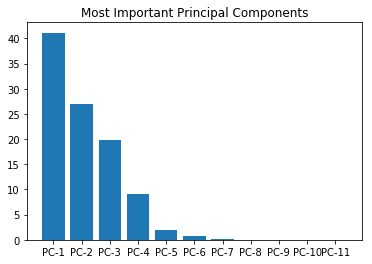

In [8]:
x = ["PC-{}".format(i) for i in range(1, len(eig_vals)+1)]
plt.title("Most Important Principal Components")
plt.bar(x, var_exp)